<center><h1>1-c: SVM</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

To keep your modifications in case you want to come back later to this colab, do *File -> Save a copy in Drive*.



In [6]:
!wget http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz

--2021-10-12 18:18:52--  http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [text/plain]
Saving to: ‘15_scenes_Xy.npz’

15_scenes_Xy.npz    100%[===================>]  34.29M  86.5MB/s    in 0.4s    

2021-10-12 18:18:52 (86.5 MB/s) - ‘15_scenes_Xy.npz’ saved [35952210/35952210]



In [7]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [8]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [9]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Then a validation set from the train set:

In [11]:
X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, test_size=0.125)

Let's KFold over different values of `C`:

In [ ]:
C_values =[10**i for i in range(-1,5)]
accuracies = []

for c in C_values:
  print(f'Training SVM with C={c}')
  #TODO
  svm = SVC(C=c, gamma='scale')

  # Fit on sub-train set
  # TODO

  svm.fit(X_val_train, y_val_train)
  # Evaluate on val set
  # TODO
  pred = svm.predict(X_val_test)

  acc= accuracy_score(pred, y_val_test)

  print(f'--> accuracy = {acc}')
  accuracies.append(acc)

Training SVM with C=0.1
--> accuracy = 0.2561247216035635
Training SVM with C=1
--> accuracy = 0.534521158129176
Training SVM with C=10
--> accuracy = 0.7060133630289532
Training SVM with C=100
--> accuracy = 0.7416481069042317
Training SVM with C=1000
--> accuracy = 0.7416481069042317
Training SVM with C=10000
--> accuracy = 0.7416481069042317


In [ ]:
C_temp = [i for i in range(5,50,5)]


for c in C_temp:
  print(f'Training SVM with C={c}')
  #TODO
  svm = SVC(C=c, gamma='scale')

  # Fit on sub-train set
  # TODO

  svm.fit(X_val_train, y_val_train)
  # Evaluate on val set
  # TODO
  pred = svm.predict(X_val_test)

  acc= accuracy_score(pred, y_val_test)

  print(f'--> accuracy = {acc}')
  accuracies= np.append(accuracies, [acc])
C_values = np.append(C_values, C_temp)

Training SVM with C=5
--> accuracy = 0.6815144766146993
Training SVM with C=10
--> accuracy = 0.7060133630289532
Training SVM with C=15
--> accuracy = 0.7260579064587973
Training SVM with C=20
--> accuracy = 0.732739420935412
Training SVM with C=25
--> accuracy = 0.7394209354120267
Training SVM with C=30
--> accuracy = 0.7416481069042317
Training SVM with C=35
--> accuracy = 0.7394209354120267
Training SVM with C=40
--> accuracy = 0.7483296213808464
Training SVM with C=45
--> accuracy = 0.7505567928730512


In [22]:
C_values = [1e-1,1,10,100,1e3,1e4,1e5,1e6]
accuracies = []

for c in C_values:
  print(f'Training SVM with C={c}')
  #TODO
  svm = SVC(C=c, gamma='scale')

  # Fit on sub-train set
  # TODO

  svm.fit(X_val_train, y_val_train)
  # Evaluate on val set
  # TODO
  pred = svm.predict(X_val_test)

  acc= accuracy_score(pred, y_val_test)

  print(f'--> accuracy = {acc}')
  accuracies.append(acc)

Training SVM with C=0.1
--> accuracy = 0.24498886414253898
Training SVM with C=1
--> accuracy = 0.48106904231625836
Training SVM with C=10
--> accuracy = 0.6815144766146993
Training SVM with C=100
--> accuracy = 0.7193763919821826
Training SVM with C=1000.0
--> accuracy = 0.7171492204899778
Training SVM with C=10000.0
--> accuracy = 0.7171492204899778
Training SVM with C=100000.0
--> accuracy = 0.7171492204899778
Training SVM with C=1000000.0
--> accuracy = 0.7171492204899778


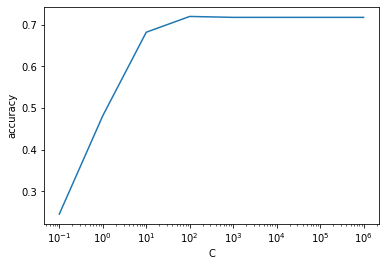

In [24]:
#TODO plot the relation between `c` and the accuracy
isort = np.argsort(C_values)
C_values = np.array(C_values)[isort]
accuracies=np.array(accuracies)[isort]

plt.plot( C_values, accuracies)
plt.ylabel('accuracy')
plt.xlabel('C')
plt.xscale('log')

In [26]:
#TODO Fit on the whole train set, evaluate on the test set 
bestC = C_values[argmax(accuracies)]

bestSvm = SVC(C=bestC, gamma='scale')
bestSvm.fit(X_train, y_train)

pred = bestSvm.predict(X_test)


acc= accuracy_score(pred, y_test)

print(f'--> accuracy = {acc}')


--> accuracy = 0.758082497212932


Do the same with different kernel values, and different decision functions:

In [17]:
# TODO
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1,10,100,1000]}

svmBest = SVC()

grid=GridSearchCV(svmBest, parameters, verbose=3,cv=3)

grid.fit(X_train, y_train)



Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. C=1, kernel=linear, score=0.701, total=   8.0s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.692, total=   7.8s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.7s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.733, total=   8.2s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.500, total=  11.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.475, total=  10.8s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.465, total=  10.7s
[CV] C=1, kernel=poly ................................................
[CV] .................... C=1, kernel=poly, score=0.351, total=  11.2s
[CV] C=1, kernel=poly ................................................
[CV] .................... C=1, kernel=poly, score=0.337, total=  11.0s
[CV] C=1, kernel=poly ................................................
[CV] .................... C=1, kernel=poly, score=0.340, total=  11.1s
[CV] C=10, kernel=linear .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  5.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [18]:
print("result:")
print(grid.cv_results_)

print('best score:', grid.best_score_)
print('best parameters:', grid.best_params_)

pred = grid.predict(X_test)

acc= accuracy_score(pred, y_test)

print(f'--> accuracy final= {acc}')

result:
{'mean_fit_time': array([5.14853175, 7.63769484, 8.04672281, 5.0794483 , 5.15446973,
       6.24400552, 5.06462479, 5.39473939, 4.7532204 , 5.36251307,
       5.47316853, 3.96311982]), 'std_fit_time': array([0.13455   , 0.11212046, 0.08704078, 0.10706249, 0.03853668,
       0.04286298, 0.11451133, 0.13580968, 0.05883372, 0.04939657,
       0.16064733, 0.07481904]), 'mean_score_time': array([2.83302585, 3.20332758, 3.07957307, 2.77217205, 2.93985343,
       2.83128031, 2.79977814, 2.96481037, 2.71660924, 2.90712595,
       3.04444377, 2.44074337]), 'std_score_time': array([0.05163789, 0.03531846, 0.01746472, 0.04002859, 0.04437989,
       0.00903141, 0.06800974, 0.02413824, 0.03973297, 0.04881575,
       0.13617843, 0.0919115 ]), 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10, 100, 100, 100, 1000, 1000, 1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=obje